# Kaggle House Price Prediction : Achieved 82 % predictive power

# Dataset :
Target : Sale Price

Independent Variables : 78

Train data : 1460 observations

Test data : 1459 observations

# Apporach

1) Idenfiy key varaibles 

2) Reduce varaibles by identifying multi-colliniarity

		



# Load Dependencies

In [255]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew
# import statsmodels 

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pprint 

# Load the Dataset 

In [256]:
cd "C:\Users\gurin\Desktop\Resume\Projects\Price Prediction" 

c:\users\gurin\desktop\resume\projects\price prediction


In [257]:
train = pd.read_csv('C:/Users/gurin/Desktop/Resume/Projects/Price Prediction/train.csv')
test = pd.read_csv('C:/Users/gurin/Desktop/Resume/Projects/Price Prediction/test.csv')

print train.head(3)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  

[3 rows x 81 columns]


# Handling missing values :

1) Write and deploy a function to identify missing values in the data

2) Combine test and train data

3) Clean data for missing values in one go.

4) Seperate test and train data


# 1(a) Write a function to identify missing values in the data

In [258]:
def missing_values(dataset):
    if type(dataset) !="pandas.core.frame.DataFrame":
        dataset = pd.DataFrame(dataset)

    # get the number of missing data points per column
    missing_values_count = dataset.isnull().sum()

    # look at the # of missing points in all the columns
#     print "\n the missing values for each column are as follows \n" ,missing_values_count[0:dataset.shape[1]]
    missing_values_per_column =missing_values_count[0:dataset.shape[1]]
    # how many total missing values do we have?
    total_cells = float(np.product(dataset.shape))
    total_missing = float(missing_values_count.sum())
    
    # percent of data that is missing
    print "\n percentage of data missing is : ", (total_missing/total_cells) * 100 
    percentage_missing =(total_missing/total_cells) * 100 
    return missing_values_per_column , percentage_missing



# 1(b) Deploy the function to identify how many columns need to be treated for missing values

In [259]:
count =0
x =missing_values(train)
x=pd.Series(x)
for element in x[0]:
    if element  != 0:
        count = count+1
print"\n Thus the COLOUMNS with missing values are  : {}".format(count)



 percentage of data missing is :  5.88956536445

 Thus the COLOUMNS with missing values are  : 19


# 2) Combine test and train data

In [260]:
# remove and save the Id field..
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' 
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# get the target variable 
y_train = train.SalePrice.values

# combine train and test and remove the target variable
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
print " \n The rows have increased as we have combined both the train and test data"




all_data size is : (2919, 79)
 
 The rows have increased as we have combined both the train and test data


# 3) Clean data for missing values in one go

In [261]:
# The Description gives the meaning of NA to mean different things ...for example  in the column PoolQC NA stands for NONE.
# As we have 19 columns to fill we do this for all 19.
# missing value is filled using mean , mode as the case may arise. 

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")




# Cross Check for any remaining Missing Values

In [262]:
#check missing values and find the % of missing values
count =0

x =missing_values(all_data)
x=pd.Series(x)
for element in x[0]:
    if element  != 0:
        count = count+1
print "\n the number of COLUMNS that have missing value are : {}".format(count)



 percentage of data missing is :  0.0

 the number of COLUMNS that have missing value are : 0


# 4) Seperate test and train data

In [263]:
train = all_data.iloc[:ntrain,:]
test = all_data.iloc[ntrain:,:]


# Convert Continous looking variables that are actualy Categorical

In [264]:
# for example MsSubClass has entries such as 20 , 40 , 80 ... theses are stand in for categorical meaning. 
#thus if left untreated the model will treat there values as continous. 

train['MSSubClass'] = train['MSSubClass'].apply(str)

train['OverallCond'] = train['OverallCond'].astype(str)

train['YrSold'] = train['YrSold'].astype(str)

train['MoSold'] = train['MoSold'].astype(str)


# Label Encode the Categorical Variables 


In [265]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

print " \n for example FireplaceQu wil now look like \n {}".format(train.FireplaceQu.head(2))



 
 for example FireplaceQu wil now look like 
 0    3
1    5
Name: FireplaceQu, dtype: int64


# Identify best inputs for the model
 As we have 79 variables to identify the best, I will run each independent variable as the only predictor. 
 This will give us an indicator of which all variables hold potential to explain the target

1) Split the Variables - Categorical( ind_cat) and Continous (ind_cont)


In [266]:
ind_cont   = train.dtypes[train.dtypes != "object"].index
ind_cat  = train.dtypes[train.dtypes == "object"].index

In [267]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,Normal,WD,0,1,8,856.0,0,2003,2003,2
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,Normal,WD,0,1,6,1262.0,298,1976,1976,1
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,Normal,WD,0,1,6,920.0,0,2001,2002,2
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,Abnorml,WD,0,1,7,756.0,0,1915,1970,0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,Normal,WD,0,1,9,1145.0,192,2000,2000,2


In [269]:
reg = linear_model.LinearRegression()
coefficients  =[]
R_square_cont =[]
R_square_cat =[]
var_cat =[]
var_cont=[]

for variable in ind_cont:
    x_train = train[variable].reshape(-1,1)
    x2_train,x2_test,y2_train,y2_test =train_test_split(x_train, y_train ,test_size =.2,random_state =42)
    reg.fit(x2_train,y2_train)
    y2_predicted=reg.predict(x2_test)
    r=reg.score(x2_train,y2_train )
    R_square_cont.append(r)
    var_cont.append(variable)
    
for variable in ind_cat:
    cat = train[variable] # we load in our categorical variable 
    x_train = pd.get_dummies(cat)
    x2_train,x2_test,y2_train,y2_test =train_test_split(x_train, y_train ,test_size =.2,random_state =42)
    reg.fit(x2_train,y2_train)
    y2_predicted=reg.predict(x2_test)
    r=reg.score(x2_train,y2_train )
    R_square_cat.append(r)
    var_cat.append(variable)
    




# Anaysis of the R-Square 

# Key findings
1) there are many variables that are accounting for less than 10% of target 

2) There is 1 varaible that accounts for over 60% of the target

3) For the model we will focus on varaibles that account for ove 30% of the variance themself

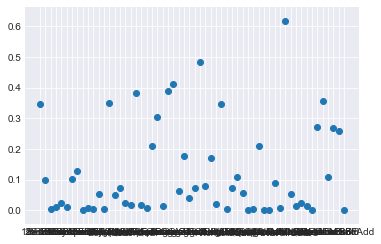

In [270]:
# Continious Variables

R_square_cont= pd.Series(R_square_cont)
x_axis = var_cont
plt.scatter(x_axis,R_square_cont)



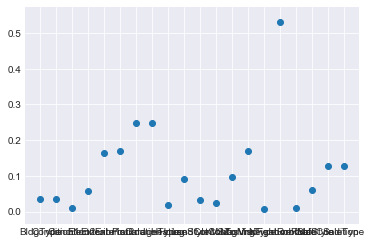

In [271]:
# Categorical Variables

R_square_cat= pd.Series(R_square_cat)
x_axis = var_cat
plt.scatter(x_axis,R_square_cat)


In [272]:
# combine into 2 Dataframes - one for Categorical and one for Continous

# for CONTINOUS 

R_square_cont=pd.Series(R_square_cont).values
ind_cont=pd.Series(ind_cont).values

R_square_cont= pd.DataFrame(R_square_cont,index = ind_cont, columns =["R-square"])

df_cont =R_square_cont[R_square_cont>0.3]
df_cont =df_cont.dropna(how='any')
df_cont

,R-square
1stFlrSF,0.345607
BsmtQual,0.349068
ExterQual,0.382306
FullBath,0.305307
GarageArea,0.389549
GarageCars,0.410869
GrLivArea,0.483932
KitchenQual,0.346956
OverallQual,0.617096
TotalBsmtSF,0.357324


In [273]:
# for CATEGORICAL 

R_square_cat=pd.Series(R_square_cat).values
ind_cat=pd.Series(ind_cat).values

R_square_cat= pd.DataFrame(R_square_cat,index = ind_cat, columns =["R-square"])

df_cat =R_square_cat[R_square_cat>0.2]
df_cat =df_cat.dropna(how='any')
df_cat

,R-square
Foundation,0.249245
GarageType,0.248771
Neighborhood,0.531902


# Analysis of TOP picks : The top pics give us a picture of what one woudl have looked at while buying a house.

1) Overall Quality - 61%

2) Neighborhood - 53%


# Model will be build using these variables

1) Build table with only these variables

2) See R-Square to check if these varaibles together are doing a better job than the other

In [275]:
# add all the variables into the model
x_train_cont = pd.concat([train["1stFlrSF"], train["BsmtQual"], train["ExterQual"],train["FullBath"] ,train["GarageArea"],train["GarageCars"], train["GrLivArea"], train["KitchenQual"],train["OverallQual"] ,train["TotalBsmtSF"],pd.get_dummies(train["Foundation"]), pd.get_dummies(train["GarageType"]), pd.get_dummies(train["Neighborhood"])], axis =1 )

# divide the model based on test and train
x2_train,x2_test,y2_train,y2_test =train_test_split(x_train_cont, y_train ,test_size =.2,random_state =42)

#fit the model
reg.fit(x2_train,y2_train)

#get the coeficients
coef = reg.coef_

# Predict the test set
y2_predicted=reg.predict(x2_test)

#Score the test set on R-square
r=reg.score(x2_train,y2_train )

print " \n The R-square on the Test-set is {}".format(r)

 
 The R-square on the Test-set is 0.822950966684


# Analysis : The model explain 82% of the variance in the Dependent 
The R-square is at 0.82.......way above the 62% of the one variable 